In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# First Car Price Dataset

In [2]:
# Load dataset
df = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
# Display the first five rows of the dataset
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Shape of dataset
df.shape

(205, 26)

In [5]:
# Variables or columns of dataframe
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
# Summary statistics of numerical columns
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
# Check for missing values
df.isnull().sum()  

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

No Null values find in the varaibles of dataset

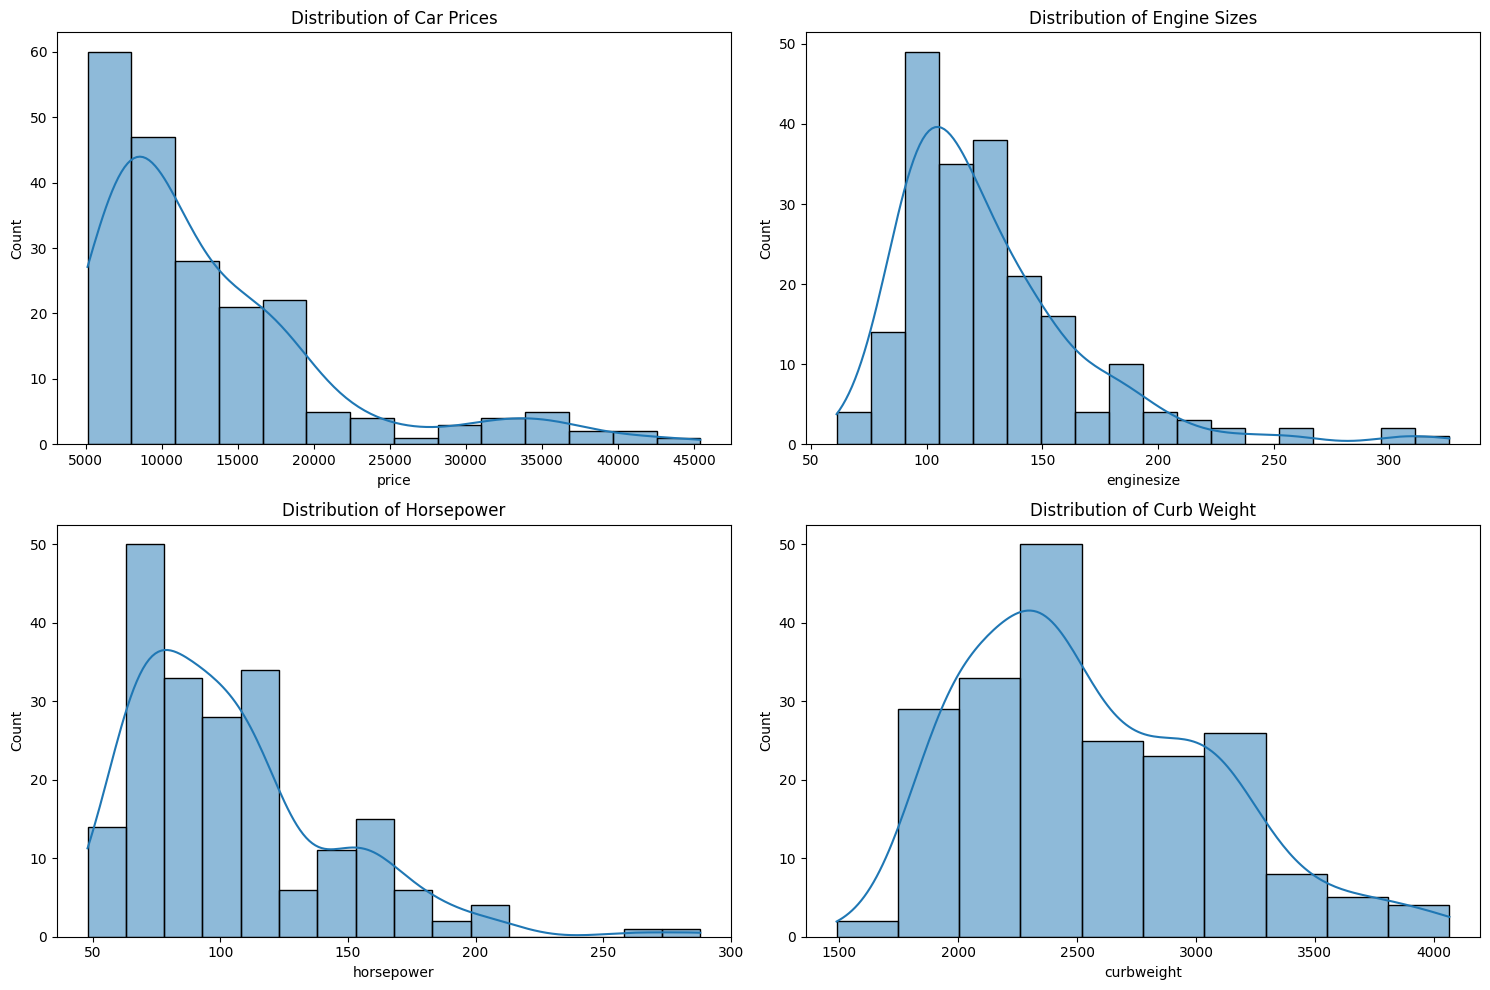

In [9]:
# Distribution of numerical features
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Car Prices')

plt.subplot(2, 2, 2)
sns.histplot(df['enginesize'], kde=True)
plt.title('Distribution of Engine Sizes')

plt.subplot(2, 2, 3)
sns.histplot(df['horsepower'], kde=True)
plt.title('Distribution of Horsepower')

plt.subplot(2, 2, 4)
sns.histplot(df['curbweight'], kde=True)
plt.title('Distribution of Curb Weight')

plt.tight_layout()
plt.show()

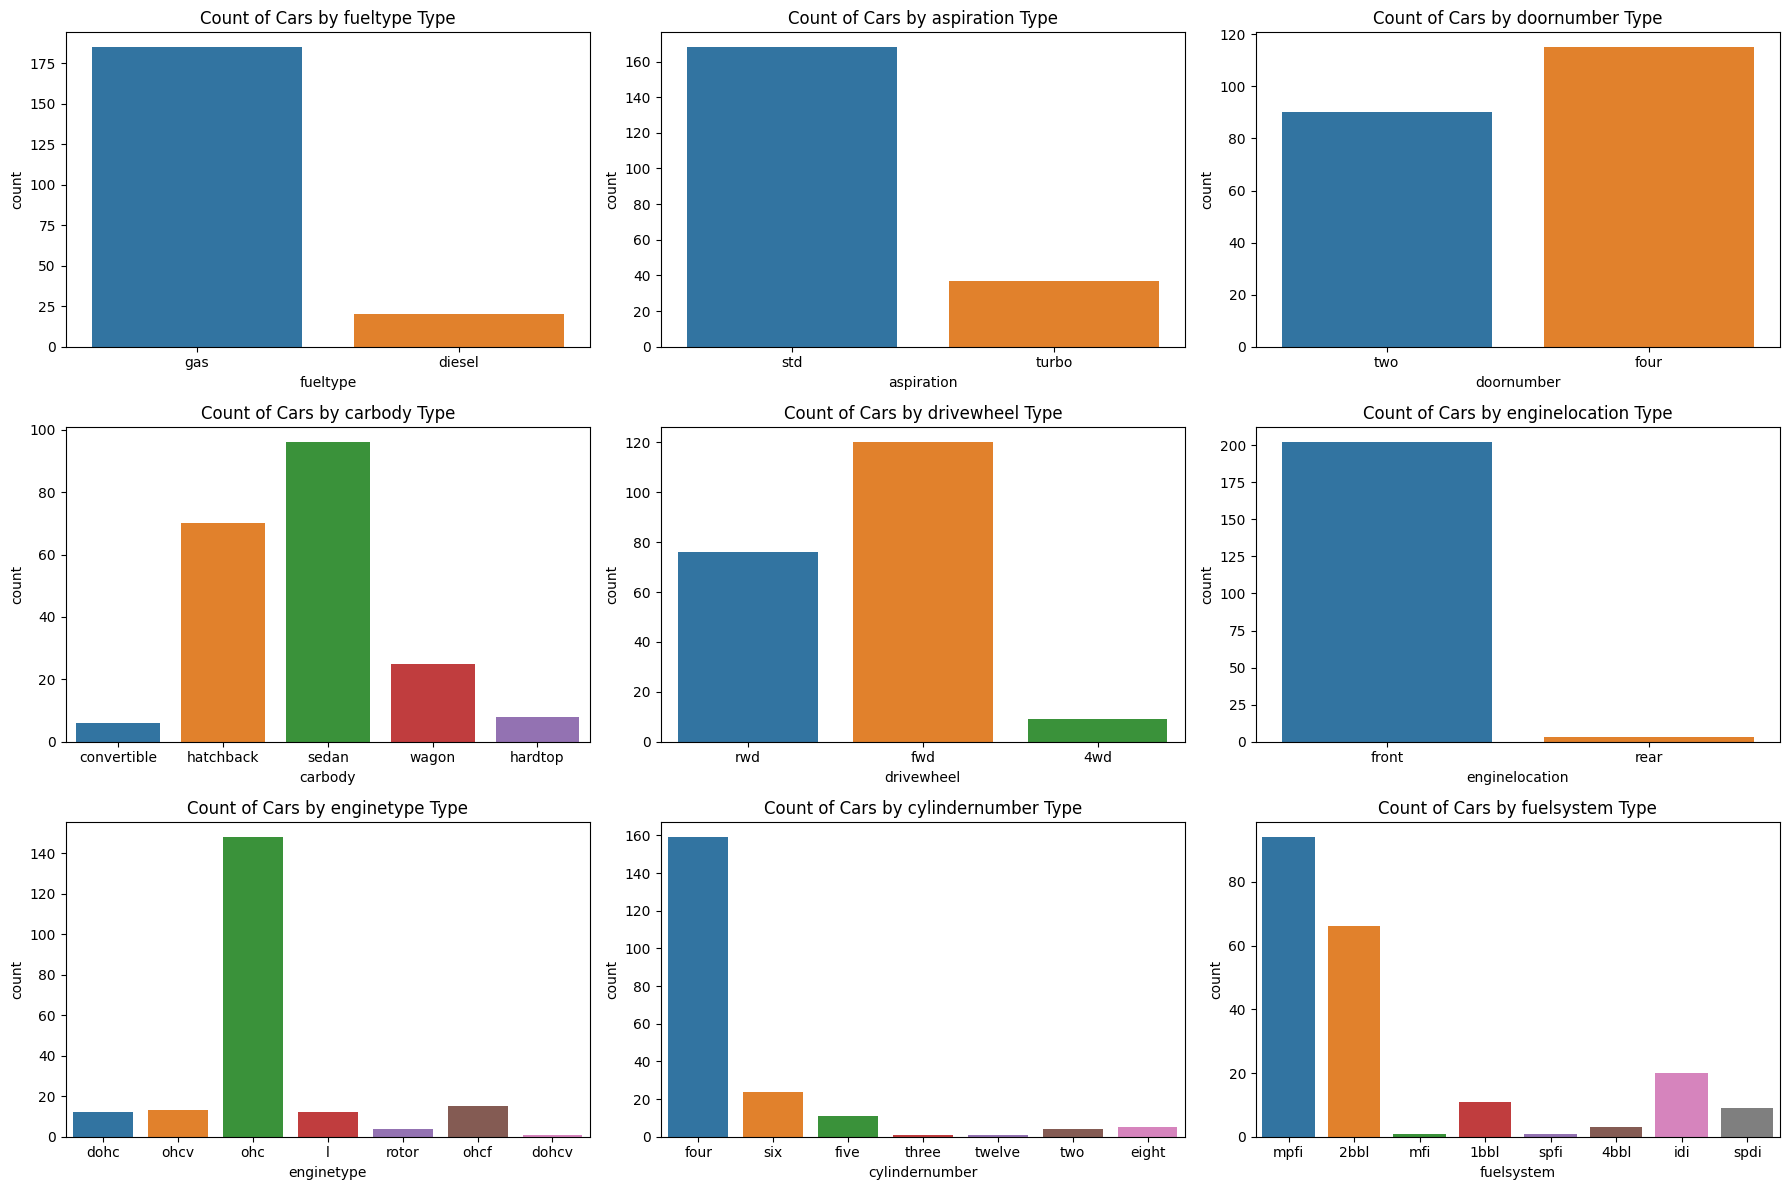

In [10]:
# Countplot for categorical features

plt.figure(figsize=(18, 12))
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
for i ,categorical_column in enumerate(categorical_columns):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=categorical_column, data=df)
    plt.title(f'Count of Cars by {categorical_column} Type')
plt.tight_layout()
plt.show()

C:\Users\LALIT\AppData\Local\Temp\ipykernel_11536\3401569923.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


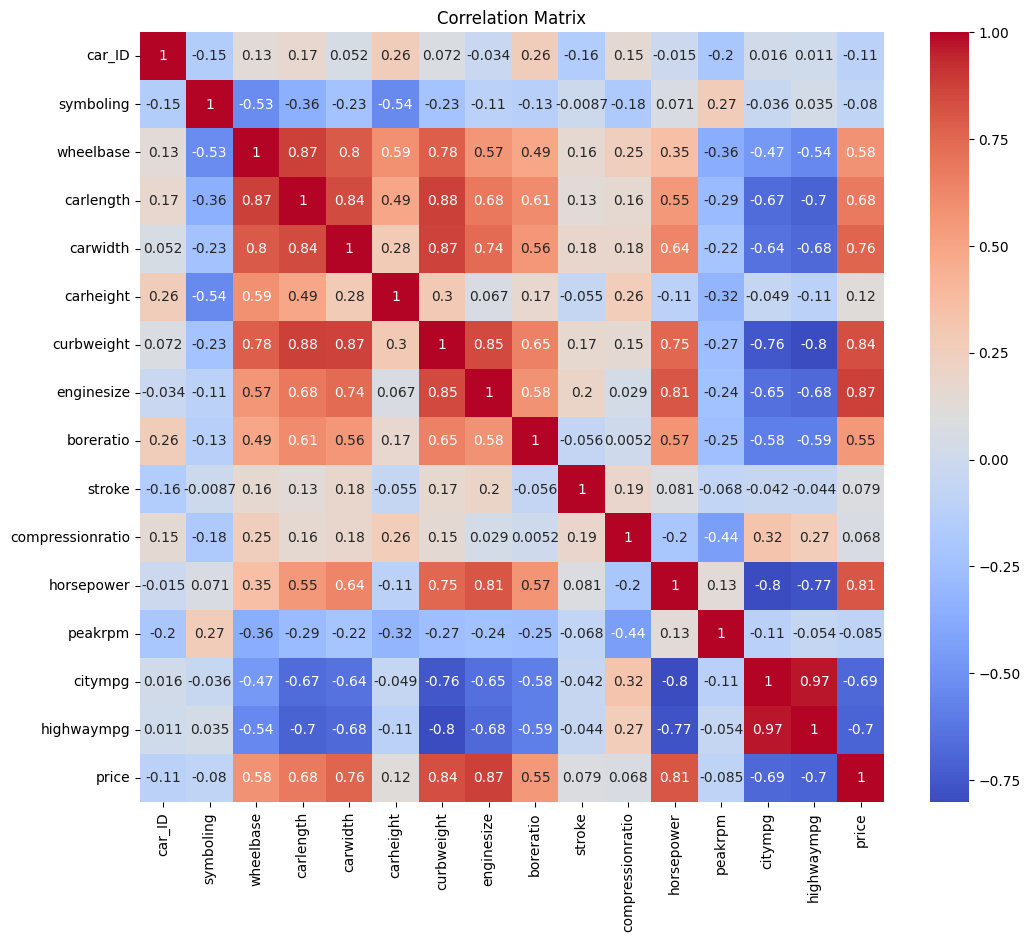

In [11]:
# Correlation matrix to see relationships between numerical variables
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

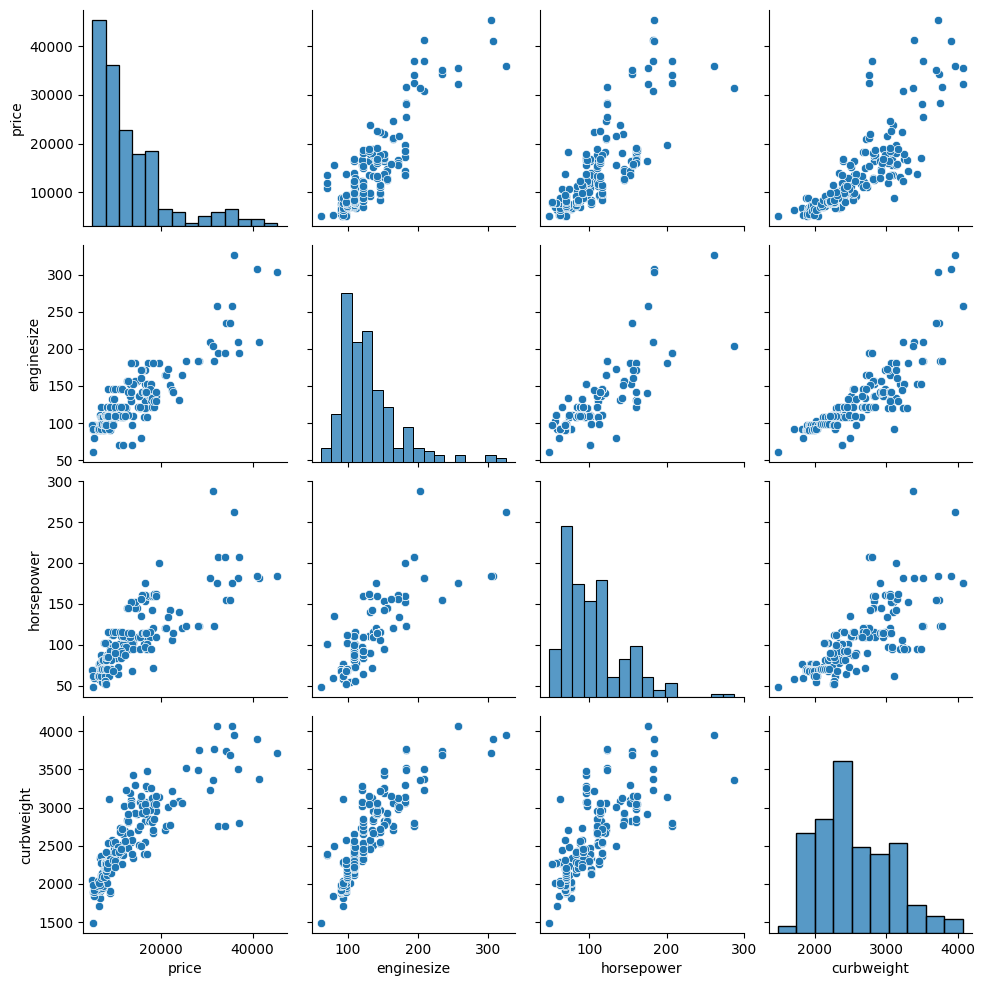

In [12]:
# Pairplot for selected variables
sns.pairplot(df[['price', 'enginesize', 'horsepower', 'fueltype', 'carbody', 'curbweight']])
plt.show()

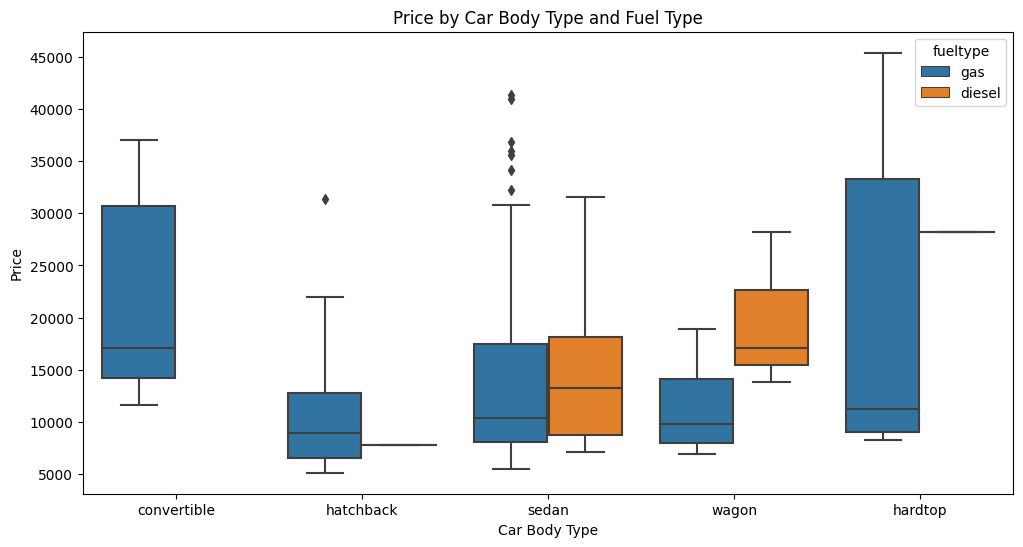

In [13]:
# Boxplot to visualize price by car body type and fuel type
plt.figure(figsize=(12, 6))
sns.boxplot(x='carbody', y='price', hue='fueltype', data=df)
plt.title('Price by Car Body Type and Fuel Type')
plt.xlabel('Car Body Type')
plt.ylabel('Price')
plt.show()

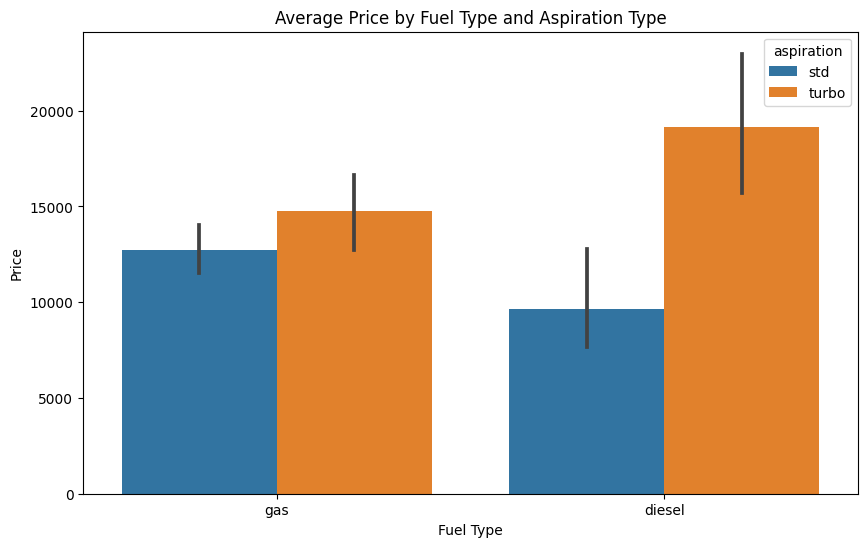

In [14]:
# Bar plot for average price based on fuel type and aspiration
plt.figure(figsize=(10, 6))
sns.barplot(x='fueltype', y='price', hue='aspiration', data=df)
plt.title('Average Price by Fuel Type and Aspiration Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

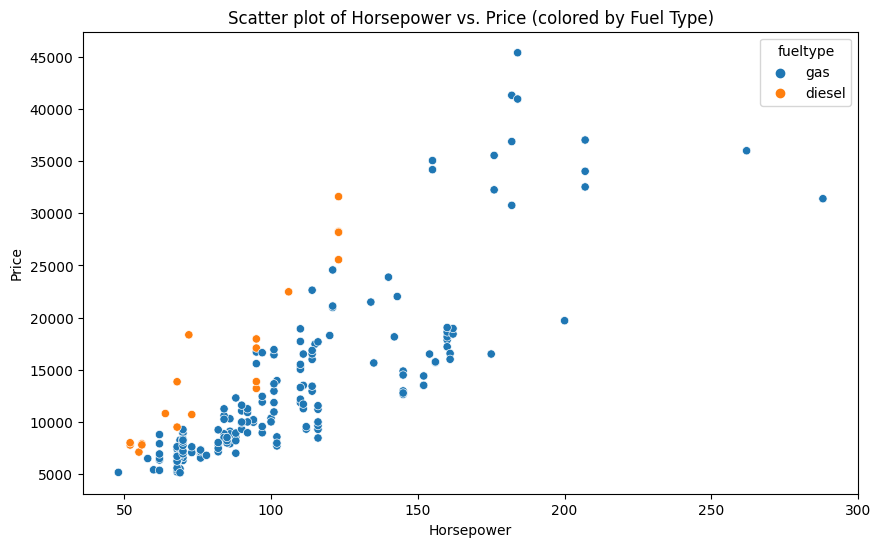

In [15]:
# Scatter plot for horsepower vs. price colored by fuel type
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='price', hue='fueltype', data=df)
plt.title('Scatter plot of Horsepower vs. Price (colored by Fuel Type)')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()

In [16]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract features with correlation coefficient greater than 0.5 with the target variable
threshold = 0.5
correlation_with_price = correlation_matrix['price'].abs()  # Get absolute correlations
selected_numerical_features = correlation_with_price[correlation_with_price > threshold].index.tolist()

# 'selected_features' now contains the numerical features with correlation > 0.5 with 'price'
print("selected_numerical_features:", selected_numerical_features)

selected_numerical_features: ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price']


C:\Users\LALIT\AppData\Local\Temp\ipykernel_11536\2103388065.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [17]:
# Select the categorical columns
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

# Extract the categorical features from the DataFrame
categorical_data = df[categorical_columns]

# Perform one-hot encoding
categorical_data_encoded = pd.get_dummies(categorical_data, drop_first=True)

In [18]:
# Concatenate numerical features and categorical features
df_new = pd.concat([df[selected_numerical_features], categorical_data_encoded], axis=1)

In [19]:
# Drop the target variable 'price' from the feature matrix
X = df_new.drop(columns=['price'])
# y has target variable 'price'
y = df_new['price']

In [20]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the feature matrix using StandardScaler
X_normalized = scaler.fit_transform(X)

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [23]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 10110078.200950045
R-squared: 0.8719335791577951


#  Second Dataset fastfood

In [24]:
# Load the dataset
dataframe = pd.read_csv('fastfood.csv')

In [25]:
# Display the first five rows of the dataset
dataframe.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,Healthy
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,1
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,0
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,0
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,1
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,0


In [26]:
# Variables or columns of dataframe
dataframe.columns

Index(['restaurant', 'item', 'calories', 'cal_fat', 'total_fat', 'sat_fat',
       'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar',
       'protein', 'vit_a', 'vit_c', 'calcium', 'Healthy'],
      dtype='object')

In [27]:
# Shape of dataset
dataframe.shape

(515, 17)

In [28]:
# Information about the dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        503 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      514 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        305 non-null    float64
 15  calcium      305 non-null    float64
 16  Healthy      515 non-null    int64  
dtypes: float64(7), int64(8), object(2)
memory usage: 68.5+ KB


In [29]:
# Summary statistics of numerical columns
dataframe.describe()

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,Healthy
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,503.000000,515.000000,514.000000,301.000000,305.000000,305.000000,515.000000
mean,530.912621,238.813592,26.590291,8.153398,0.465049,72.456311,1246.737864,45.664078,4.137177,7.262136,27.891051,18.857143,20.170492,24.852459,0.658252
std,282.436147,166.407510,18.411876,6.418811,0.839644,63.160406,689.954278,24.883342,3.037460,6.761301,17.683921,31.384330,30.592243,25.522073,3.538519
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,330.000000,120.000000,14.000000,4.000000,0.000000,35.000000,800.000000,28.500000,2.000000,3.000000,16.000000,4.000000,4.000000,8.000000,0.000000
50%,490.000000,210.000000,23.000000,7.000000,0.000000,60.000000,1110.000000,44.000000,3.000000,6.000000,24.500000,10.000000,10.000000,20.000000,1.000000
75%,690.000000,310.000000,35.000000,11.000000,1.000000,95.000000,1550.000000,57.000000,5.000000,9.000000,36.000000,20.000000,30.000000,30.000000,1.000000
max,2430.000000,1270.000000,141.000000,47.000000,8.000000,805.000000,6080.000000,156.000000,17.000000,87.000000,186.000000,180.000000,400.000000,290.000000,80.000000


In [30]:
# Check for missing values
dataframe.isnull().sum() 

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
Healthy          0
dtype: int64

In [31]:
columns_to_fill = ['fiber', 'protein', 'vit_a', 'vit_c', 'calcium']
dataframe[columns_to_fill] = dataframe[columns_to_fill].fillna(dataframe[columns_to_fill].mean())

In [32]:
# Check for missing values
dataframe.isnull().sum() 

restaurant     0
item           0
calories       0
cal_fat        0
total_fat      0
sat_fat        0
trans_fat      0
cholesterol    0
sodium         0
total_carb     0
fiber          0
sugar          0
protein        0
vit_a          0
vit_c          0
calcium        0
Healthy        0
dtype: int64

In [33]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        515 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      515 non-null    float64
 13  vit_a        515 non-null    float64
 14  vit_c        515 non-null    float64
 15  calcium      515 non-null    float64
 16  Healthy      515 non-null    int64  
dtypes: float64(7), int64(8), object(2)
memory usage: 68.5+ KB


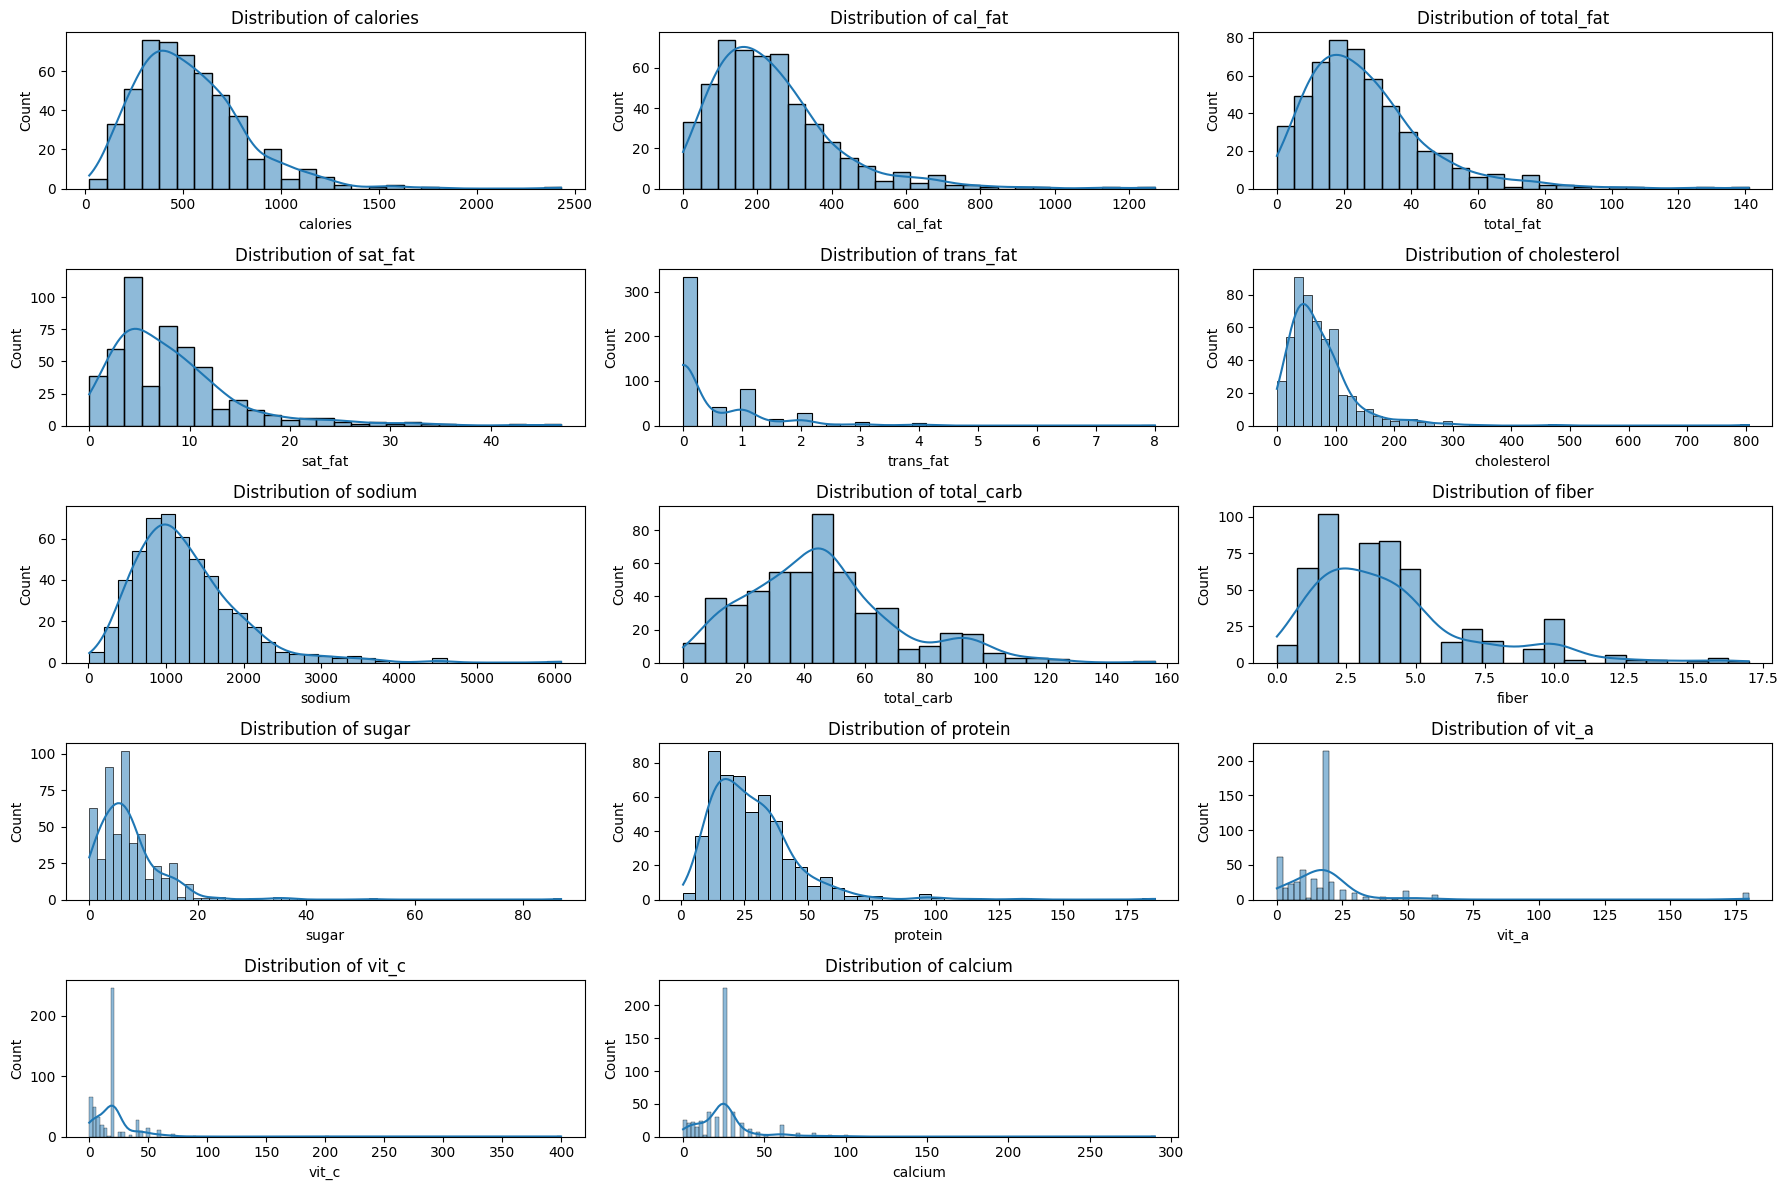

In [34]:
numerical_features = ['calories', 'cal_fat', 'total_fat', 'sat_fat', 'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar', 'protein', 'vit_a', 'vit_c', 'calcium']
plt.figure(figsize=(18, 12))
for i, numerical_feature in enumerate(numerical_features):
    plt.subplot(5, 3, i+1)
    sns.histplot(dataframe[numerical_feature], kde=True)
    plt.title(f'Distribution of {numerical_feature}')

plt.tight_layout()
plt.show()

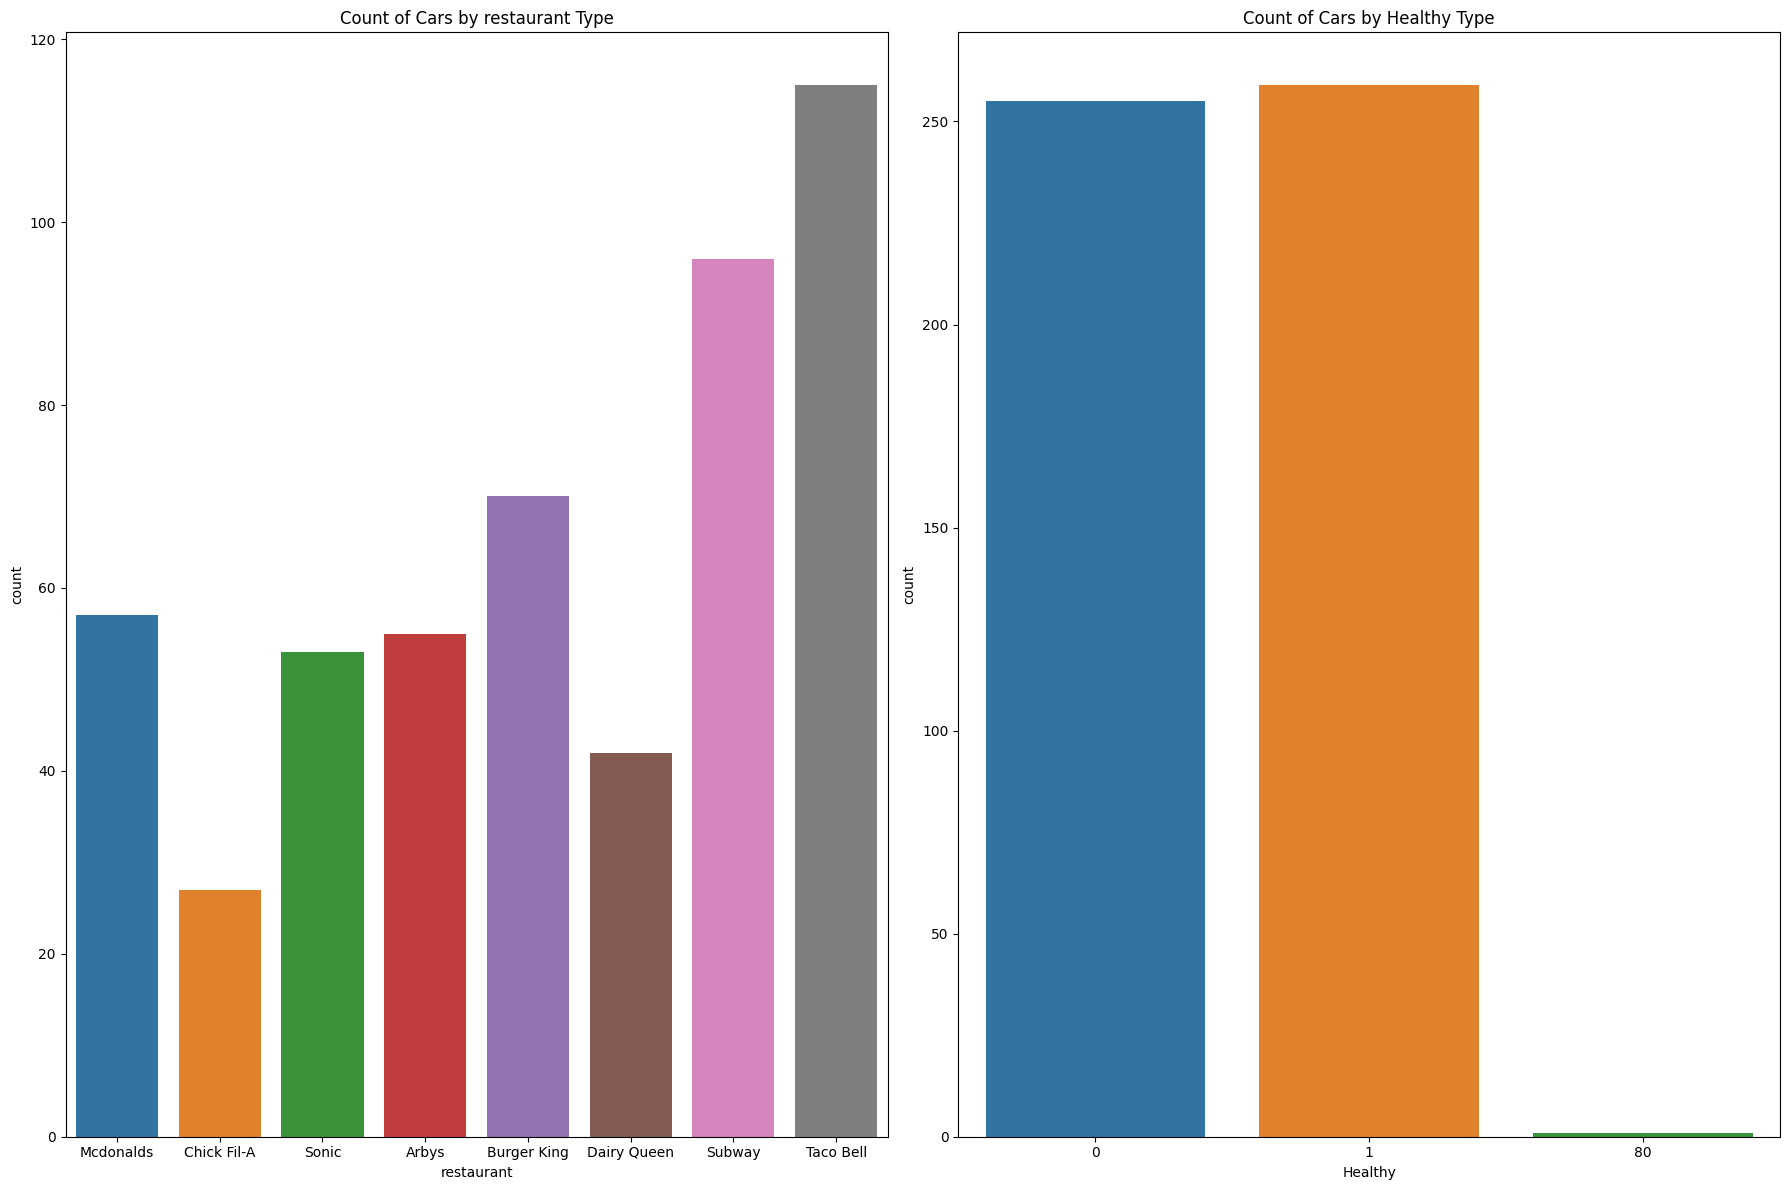

In [35]:
# Countplot for categorical features

plt.figure(figsize=(18, 12))
categorical_features = ['restaurant', 'Healthy']
for i ,categorical_feature in enumerate(categorical_features):
    plt.subplot(1, 2, i+1)
    sns.countplot(x=categorical_feature, data=dataframe)
    plt.title(f'Count of Cars by {categorical_feature} Type')
plt.tight_layout()
plt.show()

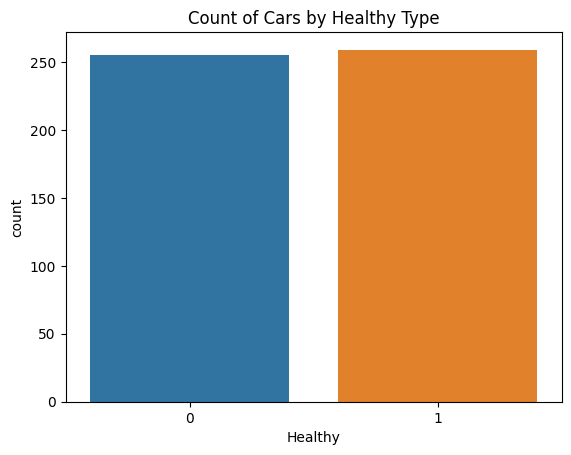

In [36]:
dataframe = dataframe[dataframe['Healthy'] != 80]

sns.countplot(x='Healthy', data=dataframe)
plt.title('Count of Cars by Healthy Type')
plt.show()

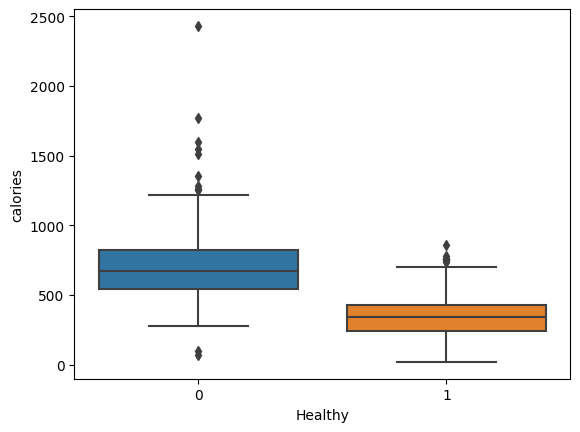

In [37]:
# Box plot for calories by 'Healthy' category
sns.boxplot(x='Healthy', y='calories', data=dataframe)
plt.show()

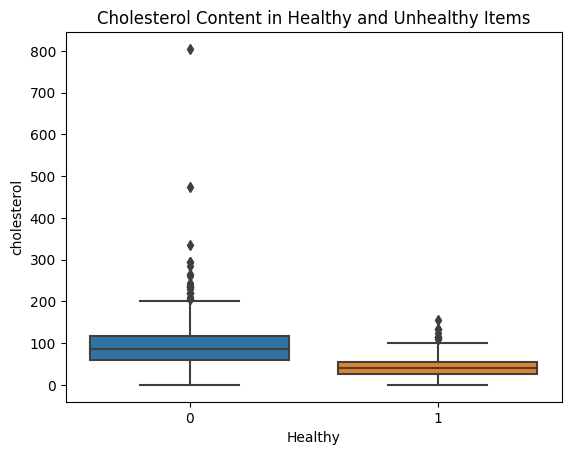

In [38]:
# Comparative analysis - box plot comparing cholesterol in healthy and unhealthy items
sns.boxplot(x='Healthy', y='cholesterol', data=dataframe)
plt.title('Cholesterol Content in Healthy and Unhealthy Items')
plt.show()

C:\Users\LALIT\AppData\Local\Temp\ipykernel_11536\708403423.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataframe.corr()


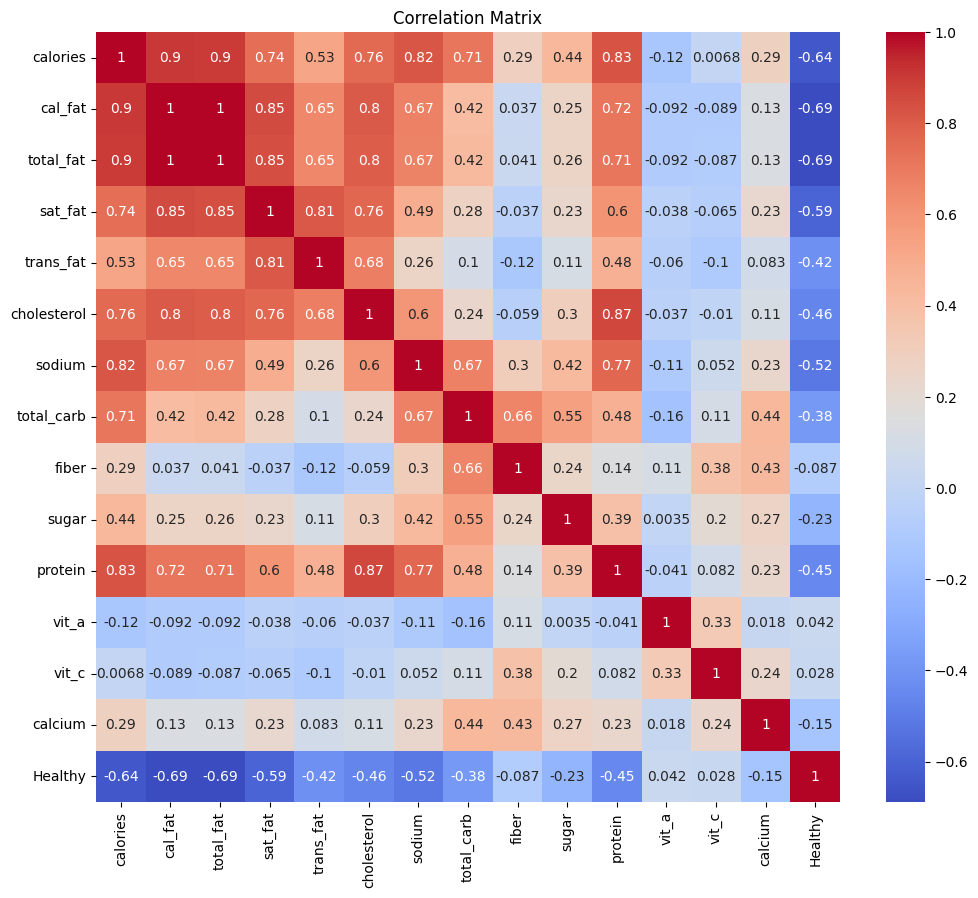

In [39]:
# Correlation matrix and heatmap
correlation_matrix = dataframe.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [40]:
# Calculate the correlation matrix
correlation_matrix = dataframe.corr()

# Extract features with correlation coefficient greater than 0.4 with the target variable
threshold = 0.4
correlation_with_price = correlation_matrix['Healthy'].abs()  # Get absolute correlations
selected_numerical_features = correlation_with_price[correlation_with_price > threshold].index.tolist()

# 'selected_features' now contains the numerical features with correlation > 0.4 with 'price'
print("selected_numerical_features:", selected_numerical_features)

selected_numerical_features: ['calories', 'cal_fat', 'total_fat', 'sat_fat', 'trans_fat', 'cholesterol', 'sodium', 'protein', 'Healthy']


C:\Users\LALIT\AppData\Local\Temp\ipykernel_11536\3867469332.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataframe.corr()


In [41]:
# Extract the categorical features from the DataFrame
categorical_data = dataframe['restaurant']

# Perform one-hot encoding
categorical_data_encoded = pd.get_dummies(categorical_data, drop_first=True)

In [42]:
# Concatenate numerical features and categorical features
dataframe_new = pd.concat([dataframe[selected_numerical_features], categorical_data_encoded], axis=1)

In [43]:
# Drop the target variable 'price' from the feature matrix
X = dataframe_new.drop(columns=['Healthy'])
# y has target variable 'price'
y = dataframe_new['Healthy']

In [44]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the feature matrix using StandardScaler
X_normalized = scaler.fit_transform(X)

In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [46]:
# Initialize the Logistic Regression model
logistic_m = LogisticRegression()

In [47]:
# Train the model
logistic_m.fit(X_train, y_train)

LogisticRegression()

In [49]:
# Make predictions on the test set
predictions = logistic_m.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.96


In [50]:
# Generate a classification report
print('Classification Report:')
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        53
           1       0.94      0.98      0.96        50

    accuracy                           0.96       103
   macro avg       0.96      0.96      0.96       103
weighted avg       0.96      0.96      0.96       103

